In [2]:
import cmocean.cm as cm
import h5py
import matplotlib as mpl
import matplotlib.colorbar as colorbar
import matplotlib.colors as mplcolours
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr

%matplotlib inline

In [3]:
mesh = xr.open_dataset('~/MEOPAR/grid/mesh_mask201702.nc')

In [4]:
oildiesel1000 = pd.read_csv('/data/sallen/results/MIDOSS/ParticleNoTests/SB_1000_diesel/new11/resOilOutput.sro', sep='\s+', skiprows=4)
oildiesel1000 = oildiesel1000.drop([0], axis=0)
length =len(oildiesel1000)
oildiesel1000 = oildiesel1000.drop([length-3, length-2, length-1, length], axis=0)

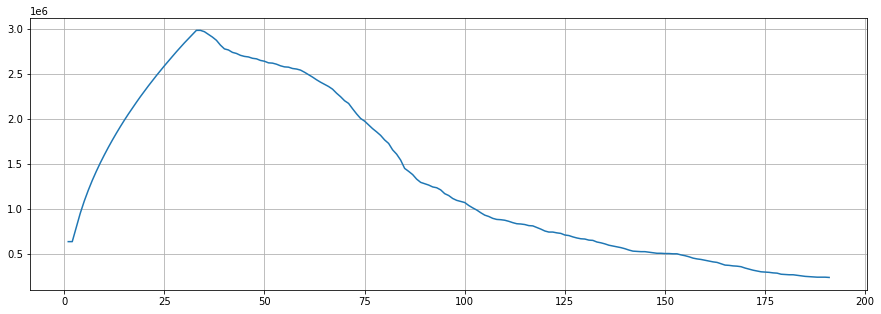

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(15,5))
oildiesel1000.Area.plot(ax=ax);
plt.grid();

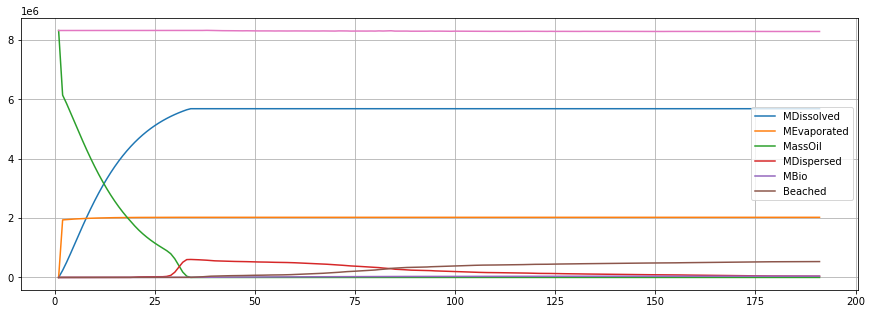

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(15,5))
oildiesel1000.MDissolved.plot();
oildiesel1000.MEvaporated.plot();
oildiesel1000.MassOil.plot();
oildiesel1000.MDispersed.plot();
oildiesel1000.MBio.plot()
massbeached = (oildiesel1000.VolOilBeached*oildiesel1000.Density/(1-oildiesel1000.VWaterContent)
    *(1-oildiesel1000.MWaterContent))

massbeached.plot(label="Beached")

plt.plot(oildiesel1000.MDissolved + oildiesel1000.MEvaporated + oildiesel1000.MassOil 
         + massbeached + oildiesel1000.MDispersed);


plt.legend();
plt.grid();

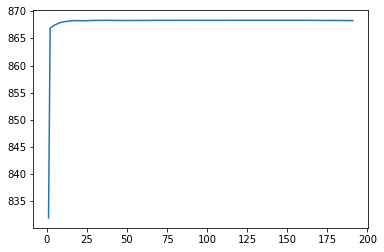

In [7]:
(oildiesel1000.Density/(1-oildiesel1000.VWaterContent)
    *(1-oildiesel1000.MWaterContent)).plot();

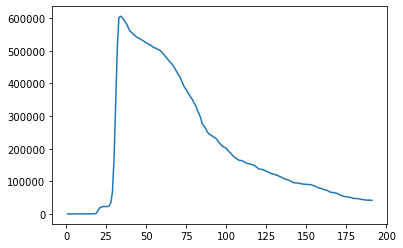

In [8]:
oildiesel1000.MDispersed.plot();

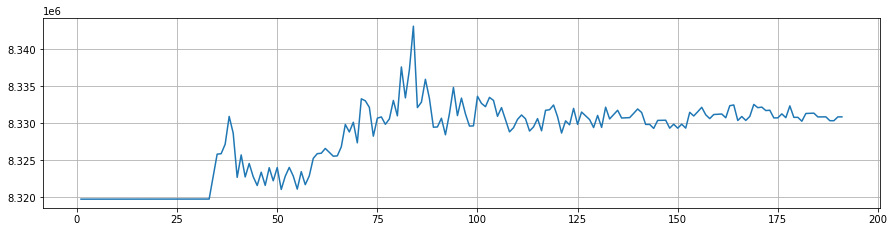

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(15, 3.5))
ax.plot(oildiesel1000.MDissolved + oildiesel1000.MEvaporated + oildiesel1000.MassOil 
         + massbeached + oildiesel1000.MDispersed + oildiesel1000.MBio);
ax.grid();

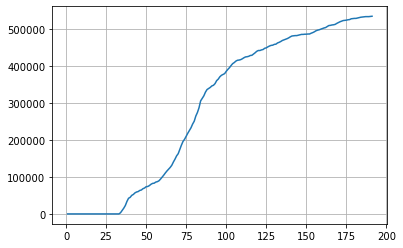

In [10]:
massbeached.plot(label="Beached");
plt.grid()

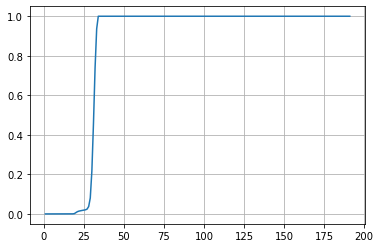

In [11]:
(oildiesel1000.MDispersed/(oildiesel1000.MDispersed + oildiesel1000.MassOil)).plot()
plt.grid()

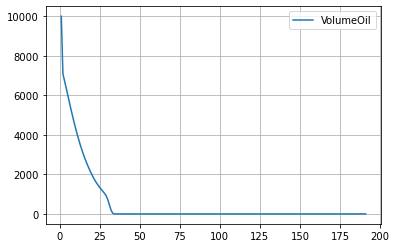

In [12]:
oildiesel1000.VolumeOil.plot();
plt.legend();
plt.grid();

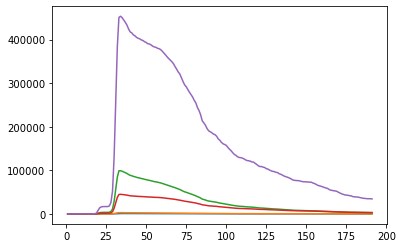

In [13]:
oildiesel1000.AnalyteMass1.plot()
oildiesel1000.AnalyteMass2.plot()
oildiesel1000.AnalyteMass3.plot()
oildiesel1000.AnalyteMass4.plot()
oildiesel1000.AnalyteMass5.plot();

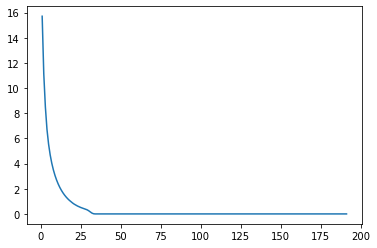

In [14]:
oildiesel1000.Thickness.plot();

In [15]:
diesel1000 = xr.open_dataset('/data/sallen/results/MIDOSS/ParticleNoTests/SB_1000_diesel/new11/Lagrangian_SB_1000_diesel_SB_1000_diesel.nc')
diesel1000

<xarray.Dataset>
Dimensions:                  (grid_x: 396, grid_x_latlon: 397, grid_y: 896, grid_y_latlon: 897, grid_z: 40, time: 191)
Coordinates:
  * time                     (time) datetime64[ns] 2018-01-15T00:30:00 ... 2018-01-22T22:30:00
  * grid_y                   (grid_y) int16 0 1 2 3 4 5 ... 891 892 893 894 895
  * grid_x                   (grid_x) int16 0 1 2 3 4 5 ... 391 392 393 394 395
  * grid_z                   (grid_z) int16 0 1 2 3 4 5 6 ... 34 35 36 37 38 39
  * grid_y_latlon            (grid_y_latlon) float32 0.0 1.0 2.0 ... 895.0 896.0
  * grid_x_latlon            (grid_x_latlon) float32 0.0 1.0 2.0 ... 395.0 396.0
Data variables:
    OilConcentration_2D      (time, grid_y, grid_x) float64 ...
    Thickness_2D             (time, grid_y, grid_x) float64 ...
    Dissolution_3D           (time, grid_z, grid_y, grid_x) float64 ...
    OilConcentration_3D      (time, grid_z, grid_y, grid_x) float64 ...
    OilWaterColumnOilVol_3D  (time, grid_z, grid_y, grid_x) float64 ...
    Latitude                 (grid_y_latlon, grid_x_latlon) float64 ...
    Longitude                (grid_y_latlon, grid_x_latlon) float64 ...
    Beaching_Time            (grid_y, grid_x) datetime64[ns] ...
    Beaching_Volume          (grid_y, grid_x) float64 ...
    Oil_Arrival_Time         (grid_y, grid_x) datetime64[ns] ...
Attributes:
    nco_openmp_thread_number:   1
    history:                    Mon Nov 23 19:05:38 2020: ncks -4 -L4 -A /loc...
    NCO:                        4.6.6
    history_of_appended_files:  Mon Nov 23 19:05:38 2020: Appended file /loca...

In [16]:
imin, imax = 200, 350
jmin, jmax = 150, 280

<xarray.DataArray 'OilWaterColumnOilVol_3D' ()>
array(1860.458)
Coordinates:
    time     datetime64[ns] 2018-01-15T20:30:00


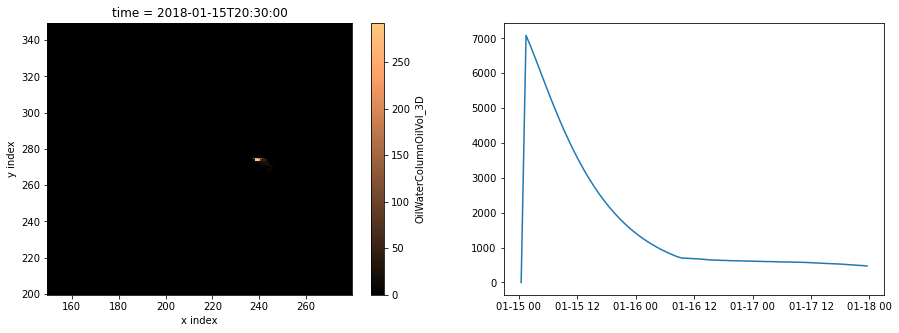

In [17]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
it = 20

field = diesel1000.OilWaterColumnOilVol_3D[it]
(field[:, imin:imax , jmin:jmax].sum(axis=0)).plot(ax=axs[0], cmap='copper')
print (diesel1000.OilWaterColumnOilVol_3D[it, :, imin:imax, jmin:jmax].sum(axis=0).sum(axis=0).sum(axis=0))

axs[1].plot(diesel1000.time[0:72], diesel1000.OilWaterColumnOilVol_3D[0:72].sum(axis=1).sum(axis=1).sum(axis=1)
           )

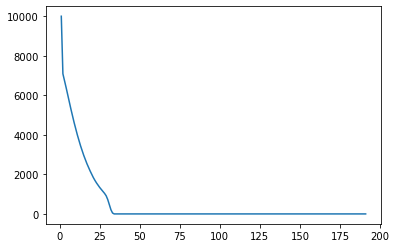

In [18]:
oildiesel1000.VolumeOil.plot()

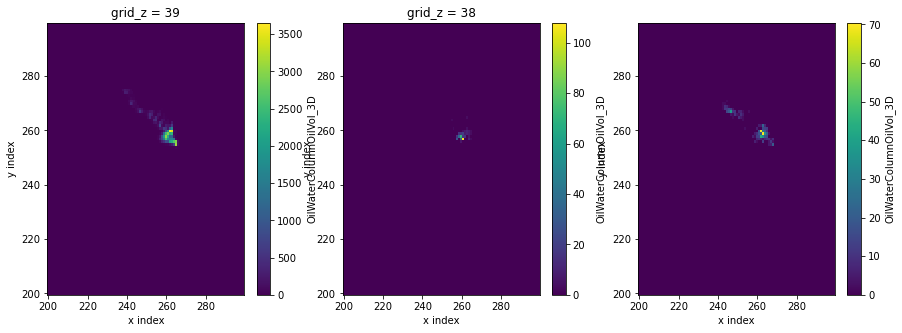

In [19]:
tmax = 20
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
diesel1000.OilWaterColumnOilVol_3D[1:tmax+1, 39, 200:300, 200:300].sum(axis=0).plot(ax=axs[0]);
diesel1000.OilWaterColumnOilVol_3D[1:tmax+1, 38, 200:300, 200:300].sum(axis=0).plot(ax=axs[1]);
diesel1000.OilWaterColumnOilVol_3D[1:tmax+1, 0:38, 200:300, 200:300].sum(axis=0).sum(axis=0).plot(ax=axs[2]);

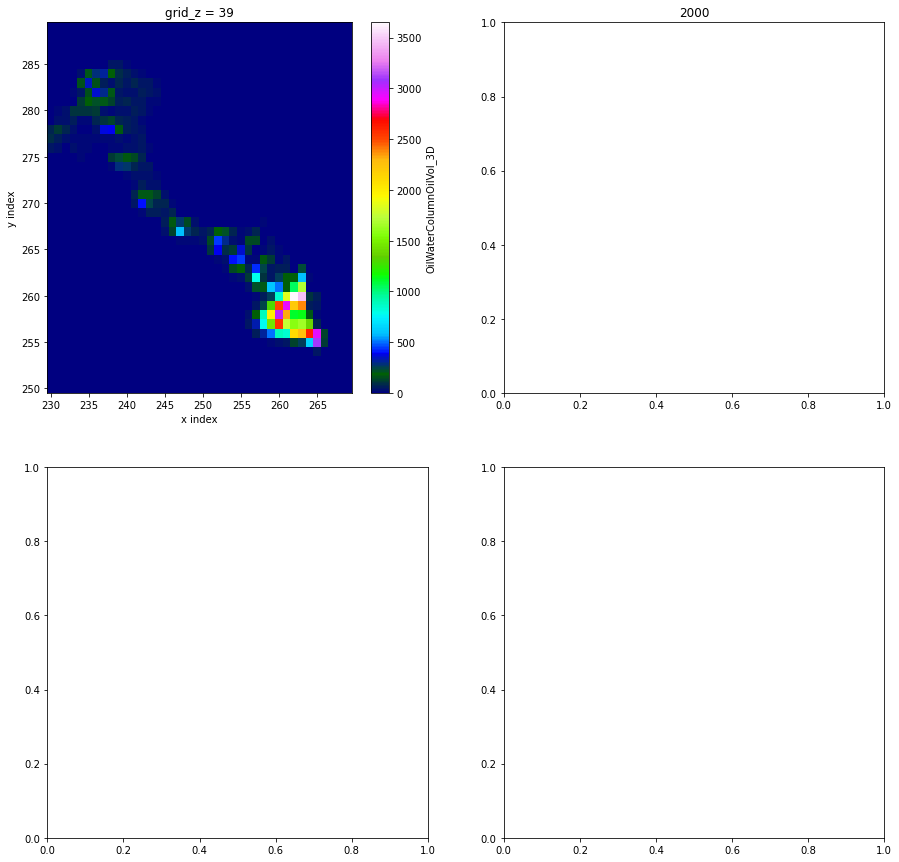

In [20]:
fig, axs = plt.subplots(2, 2, figsize=(15, 15))
imin, imax = 250, 290
jmin, jmax = 230, 270
diesel1000.OilWaterColumnOilVol_3D[:, 39, imin:imax, jmin:jmax].sum(axis=0).plot(ax=axs[0, 0], cmap='gist_ncar');
#ds2000.OilWaterColumnOilVol_3D[:, 39, imin:imax, jmin:jmax].sum(axis=0).plot(ax=axs[0, 1], cmap='gist_ncar');
#ds5000.OilWaterColumnOilVol_3D[:, 39, imin:imax, jmin:jmax].sum(axis=0).plot(ax=axs[1, 0], cmap='gist_ncar');
#ds10000.OilWaterColumnOilVol_3D[:, 39, imin:imax, jmin:jmax].sum(axis=0).plot(ax=axs[1, 1], cmap='gist_ncar');
axs[0, 1].set_title('2000');

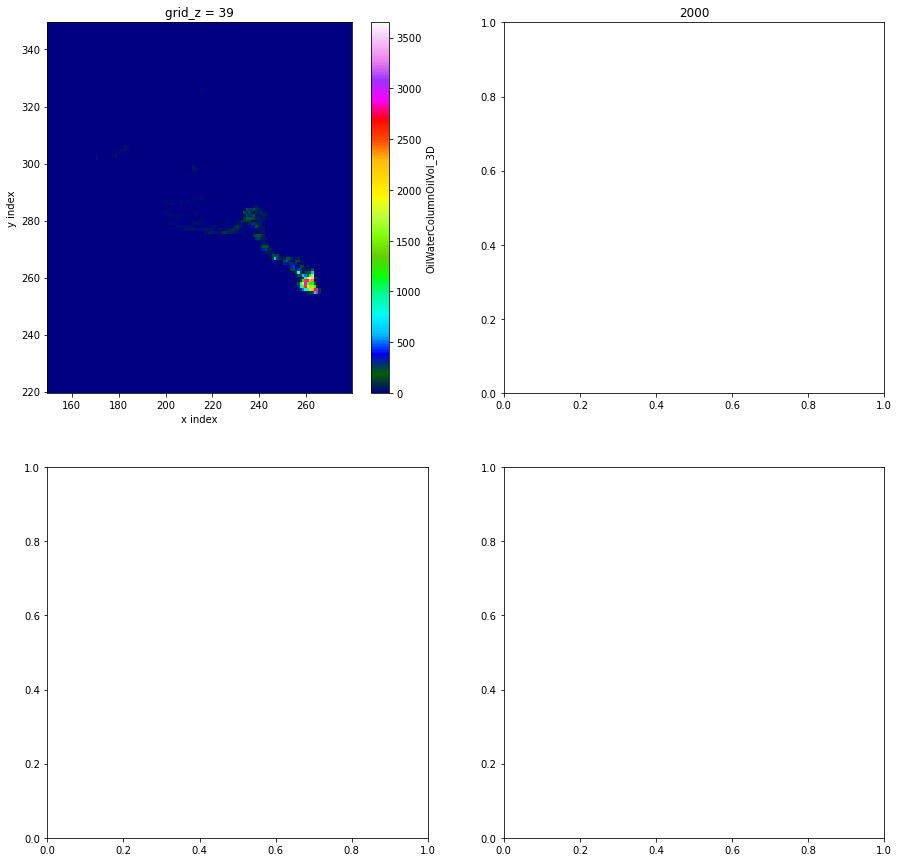

In [21]:
fig, axs = plt.subplots(2, 2, figsize=(15, 15))
imin, imax = 220, 350
jmin, jmax = 150, 280
diesel1000.OilWaterColumnOilVol_3D[:, 39, imin:imax, jmin:jmax].sum(axis=0).plot(ax=axs[0, 0], cmap='gist_ncar');
#ds2000.OilWaterColumnOilVol_3D[:, 39, imin:imax, jmin:jmax].sum(axis=0).plot(ax=axs[0, 1], cmap='gist_ncar');
#ds5000.OilWaterColumnOilVol_3D[:, 39, imin:imax, jmin:jmax].sum(axis=0).plot(ax=axs[1, 0], cmap='gist_ncar');
#ds10000.OilWaterColumnOilVol_3D[:, 39, imin:imax, jmin:jmax].sum(axis=0).plot(ax=axs[1, 1], cmap='gist_ncar');
axs[0, 1].set_title('2000');

<xarray.DataArray 'Beaching_Volume' ()>
array(615.75950367)


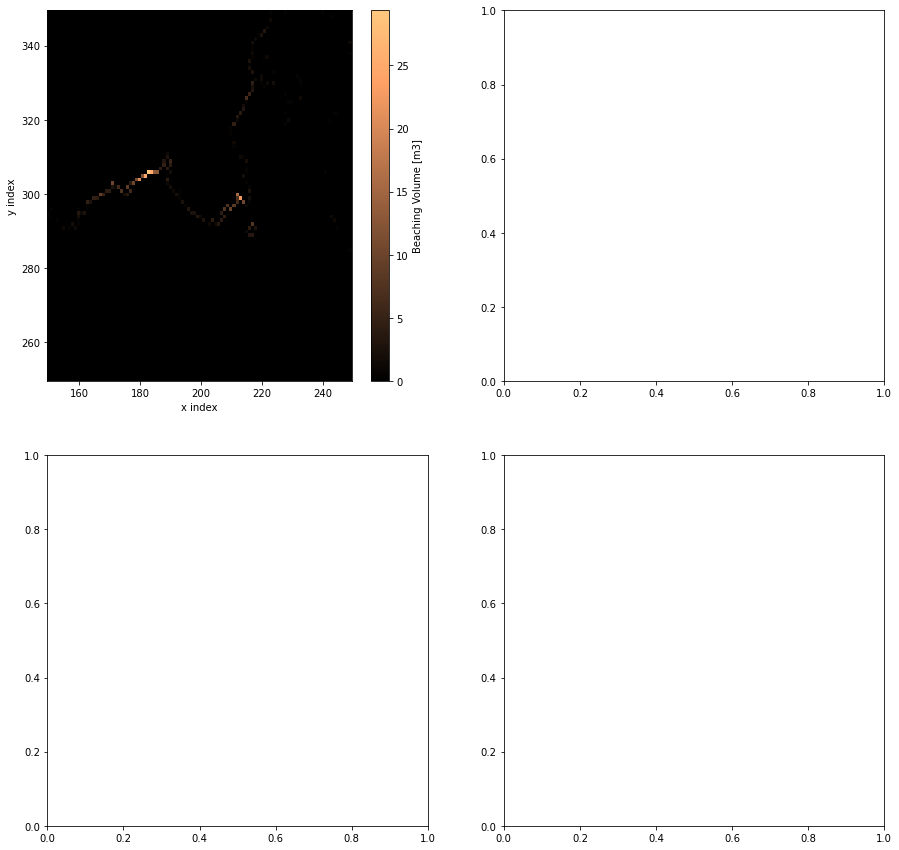

In [22]:
fig, axs = plt.subplots(2, 2, figsize=(15, 15))
imin, imax = 250, 350
jmin, jmax = 150, 250
diesel1000.Beaching_Volume[imin:imax , jmin:jmax].plot(ax=axs[0,0], cmap='copper')
print (diesel1000.Beaching_Volume.sum(axis=0).sum(axis=0))
#ds2000.Beaching_Volume[imin:imax , jmin:jmax].plot(ax=axs[0,1], cmap='copper')
#print (ds2000.Beaching_Volume.sum(axis=0).sum(axis=0))
#ds5000.Beaching_Volume[imin:imax , jmin:jmax].plot(ax=axs[1,0], cmap='copper')
#print (ds5000.Beaching_Volume.sum(axis=0).sum(axis=0))
#ds10000.Beaching_Volume[imin:imax , jmin:jmax].plot(ax=axs[1,1], cmap='copper')
#print (ds10000.Beaching_Volume.sum(axis=0).sum(axis=0))

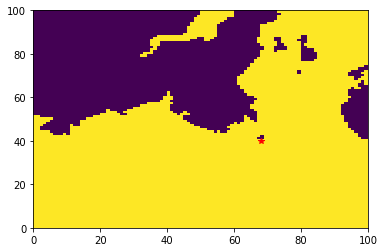

In [23]:
plt.pcolormesh(mesh.tmask[0, 0, imin:imax, jmin:jmax])
plt.plot(218-jmin, 290-jmax, 'r*')

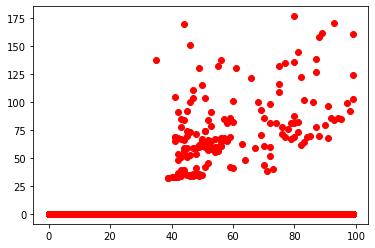

In [24]:
#scale = 86400 * 1e9
#days = np.ma.masked_array((diesel1000.Beaching_Time[imin:imax, jmin:jmax]-diesel1000.Beaching_Time[:].min())/scale,
#                         diesel1000.Beaching_Time[imin:imax, jmin:jmax] == diesel1000.Beaching_Time[:].min())
#plt.pcolormesh(diesel1000.Beaching_Time[imin:imax, jmin:jmax]);
bt = np.array(diesel1000.Beaching_Time[imin:imax, jmin:jmax] - diesel1000.Beaching_Time[imin:imax, jmin:jmax].min())
plt.plot(bt/1e9/3600, 'ro');

In [25]:
diesel1000.time

<xarray.DataArray 'time' (time: 191)>
array(['2018-01-15T00:30:00.000000000', '2018-01-15T01:30:00.000000000',
       '2018-01-15T02:30:00.000000000', '2018-01-15T03:30:00.000000000',
       '2018-01-15T04:30:00.000000000', '2018-01-15T05:30:00.000000000',
       '2018-01-15T06:30:00.000000000', '2018-01-15T07:30:00.000000000',
       '2018-01-15T08:30:00.000000000', '2018-01-15T09:30:00.000000000',
       '2018-01-15T10:30:00.000000000', '2018-01-15T11:30:00.000000000',
       '2018-01-15T12:30:00.000000000', '2018-01-15T13:30:00.000000000',
       '2018-01-15T14:30:00.000000000', '2018-01-15T15:30:00.000000000',
       '2018-01-15T16:30:00.000000000', '2018-01-15T17:30:00.000000000',
       '2018-01-15T18:30:00.000000000', '2018-01-15T19:30:00.000000000',
       '2018-01-15T20:30:00.000000000', '2018-01-15T21:30:00.000000000',
       '2018-01-15T22:30:00.000000000', '2018-01-15T23:30:00.000000000',
       '2018-01-16T00:30:00.000000000', '2018-01-16T01:30:00.000000000',
       '2018-01-16T02:30:00.000000000', '2018-01-16T03:30:00.000000000',
       '2018-01-16T04:30:00.000000000', '2018-01-16T05:30:00.000000000',
       '2018-01-16T06:30:00.000000000', '2018-01-16T07:30:00.000000000',
       '2018-01-16T08:30:00.000000000', '2018-01-16T09:30:00.000000000',
       '2018-01-16T10:30:00.000000000', '2018-01-16T11:30:00.000000000',
       '2018-01-16T12:30:00.000000000', '2018-01-16T13:30:00.000000000',
       '2018-01-16T14:30:00.000000000', '2018-01-16T15:30:00.000000000',
       '2018-01-16T16:30:00.000000000', '2018-01-16T17:30:00.000000000',
       '2018-01-16T18:30:00.000000000', '2018-01-16T19:30:00.000000000',
       '2018-01-16T20:30:00.000000000', '2018-01-16T21:30:00.000000000',
       '2018-01-16T22:30:00.000000000', '2018-01-16T23:30:00.000000000',
       '2018-01-17T00:30:00.000000000', '2018-01-17T01:30:00.000000000',
       '2018-01-17T02:30:00.000000000', '2018-01-17T03:30:00.000000000',
       '2018-01-17T04:30:00.000000000', '2018-01-17T05:30:00.000000000',
       '2018-01-17T06:30:00.000000000', '2018-01-17T07:30:00.000000000',
       '2018-01-17T08:30:00.000000000', '2018-01-17T09:30:00.000000000',
       '2018-01-17T10:30:00.000000000', '2018-01-17T11:30:00.000000000',
       '2018-01-17T12:30:00.000000000', '2018-01-17T13:30:00.000000000',
       '2018-01-17T14:30:00.000000000', '2018-01-17T15:30:00.000000000',
       '2018-01-17T16:30:00.000000000', '2018-01-17T17:30:00.000000000',
       '2018-01-17T18:30:00.000000000', '2018-01-17T19:30:00.000000000',
       '2018-01-17T20:30:00.000000000', '2018-01-17T21:30:00.000000000',
       '2018-01-17T22:30:00.000000000', '2018-01-17T23:30:00.000000000',
       '2018-01-18T00:30:00.000000000', '2018-01-18T01:30:00.000000000',
       '2018-01-18T02:30:00.000000000', '2018-01-18T03:30:00.000000000',
       '2018-01-18T04:30:00.000000000', '2018-01-18T05:30:00.000000000',
       '2018-01-18T06:30:00.000000000', '2018-01-18T07:30:00.000000000',
       '2018-01-18T08:30:00.000000000', '2018-01-18T09:30:00.000000000',
       '2018-01-18T10:30:00.000000000', '2018-01-18T11:30:00.000000000',
       '2018-01-18T12:30:00.000000000', '2018-01-18T13:30:00.000000000',
       '2018-01-18T14:30:00.000000000', '2018-01-18T15:30:00.000000000',
       '2018-01-18T16:30:00.000000000', '2018-01-18T17:30:00.000000000',
       '2018-01-18T18:30:00.000000000', '2018-01-18T19:30:00.000000000',
       '2018-01-18T20:30:00.000000000', '2018-01-18T21:30:00.000000000',
       '2018-01-18T22:30:00.000000000', '2018-01-18T23:30:00.000000000',
       '2018-01-19T00:30:00.000000000', '2018-01-19T01:30:00.000000000',
       '2018-01-19T02:30:00.000000000', '2018-01-19T03:30:00.000000000',
       '2018-01-19T04:30:00.000000000', '2018-01-19T05:30:00.000000000',
       '2018-01-19T06:30:00.000000000', '2018-01-19T07:30:00.000000000',
       '2018-01-19T08:30:00.000000000', '2018-01-19T09:30:00.000000000',
       '2018-01-19T10:30:00.000000000', '2018-01-19T11:30:00.000000000',
       '2018-01-19T1

In [1]:
watercolour = 'lightskyblue'
landcolour = 'papayawhip'
waterland_cmap = mplcolours.LinearSegmentedColormap.from_list('mycmap', [(0, watercolour),  (0.85, watercolour), 
                                                    (0.850001, landcolour), (1, landcolour)])
xs = range(jmin, jmax)
ys = range(imin, imax)
xx, yy = np.meshgrid(xs, ys)
mymask = oilLag.Beaching_Time[imin:imax, jmin:jmax] == oilLag.Beaching_Time[imin:imax, jmin:jmax].min()
days = np.ma.array(bt/1e9/86400., mask=mymask)

NameError: name 'mplcolours' is not defined

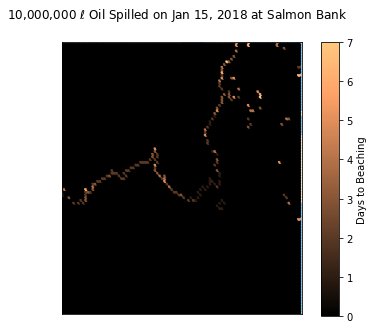

In [26]:
cnorm = mplcolours.Normalize(vmin=0, vmax=7)
mycmap = mpl.cm.copper
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.set_aspect(500/440.)
ax.tick_params(axis='both', which='both', bottom=False, left=False, labelbottom=False, labelleft=False)
ax.pcolormesh(1-mesh.tmask[0, 0, imin:imax, jmin:jmax], cmap=waterland_cmap)
ax.scatter(xx-jmin, yy-imin, s=10, c=days, cmap='copper', vmin=0, vmax=7);
ax_cbar = fig.add_axes([0.9, 0.12, 0.05, 0.76])
cb = colorbar.ColorbarBase(ax=ax_cbar, cmap=mycmap, norm=cnorm);
cb.set_label('Days to Beaching')
fig.suptitle('10,000,000 $\ell$ Oil Spilled on Jan 15, 2018 at Salmon Bank');

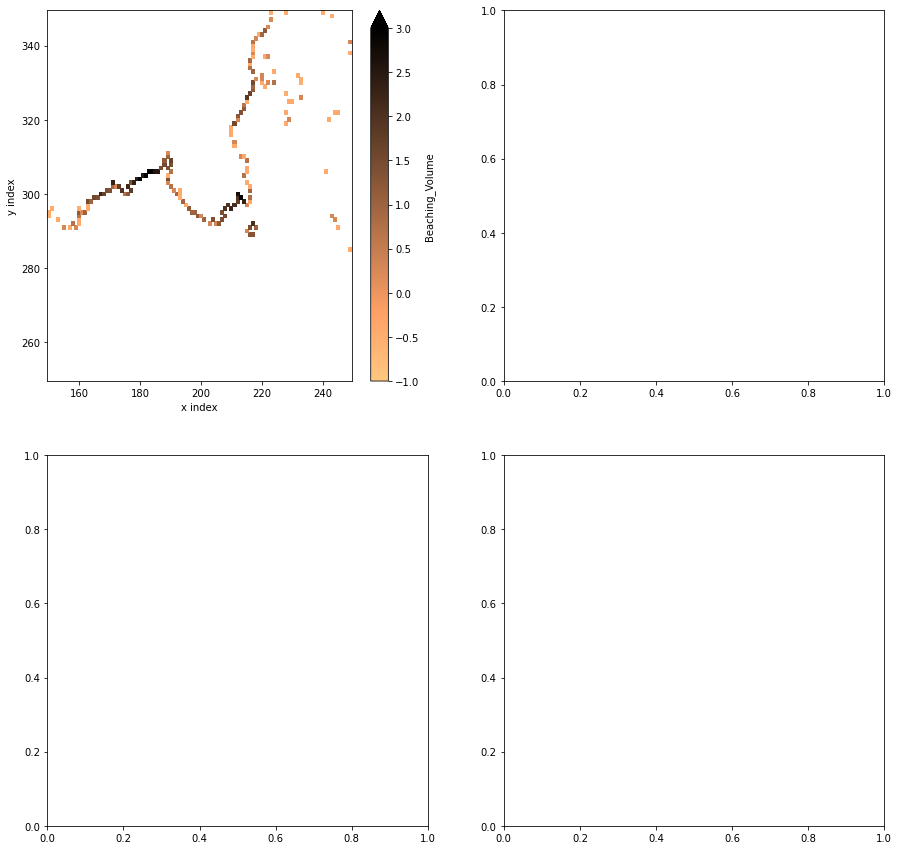

In [29]:
fig, axs = plt.subplots(2, 2, figsize=(15, 15))
imin, imax = 250, 350
jmin, jmax = 150, 250
np.log(diesel1000.Beaching_Volume[imin:imax , jmin:jmax]).plot(ax=axs[0,0], cmap='copper_r', 
                                                               vmax=3, vmin=-1);

In [ ]:
for i in range(imin, imax):
    for j in range (jmin, jmax):
        if diesel1000.Beaching_Volume[i , j] > 0:
            print (i, j, diesel1000.Beaching_Volume[i, j], diesel1000.Beaching_Time[i, j])

In [ ]:
222*850